# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'
query_url = url + 'appid=' + weather_api_key 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    #print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kerikeri
Processing Record 2 of Set 1 | markovo
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | guerrero negro
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | kapuskasing
Processing Record 7 of Set 1 | taoudenni
Processing Record 8 of Set 1 | tura
Processing Record 9 of Set 1 | codrington
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | dryden
Processing Record 12 of Set 1 | la ronge
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | huntingdon
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | port moresby
Processing Record 17 of Set 1 | luderitz
Processing Record 18 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 19 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 20 of Set 1 | cartagena del chaira
Processing Record 21 of Set 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kerikeri,-35.2268,173.9474,288.66,81,99,0.89,NZ,1691797868
1,markovo,57.3206,107.0881,291.99,66,10,0.30,RU,1691797868
2,yellowknife,62.4560,-114.3525,290.44,67,75,6.17,CA,1691797591
3,guerrero negro,27.9769,-114.0611,296.40,74,23,9.06,MX,1691797868
4,blackmans bay,-43.0167,147.3167,283.22,87,57,4.39,AU,1691797868


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,288.66,81,99,0.89,NZ,1691797868
1,markovo,57.3206,107.0881,291.99,66,10,0.30,RU,1691797868
2,yellowknife,62.4560,-114.3525,290.44,67,75,6.17,CA,1691797591
3,guerrero negro,27.9769,-114.0611,296.40,74,23,9.06,MX,1691797868
4,blackmans bay,-43.0167,147.3167,283.22,87,57,4.39,AU,1691797868


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

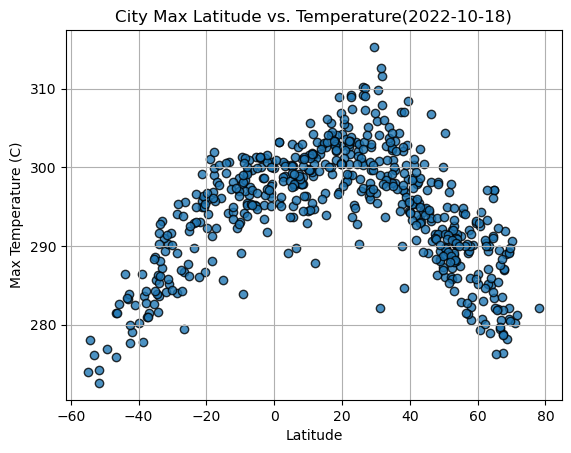

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],
            city_data_df['Max Temp'],
            edgecolor='black', linewidth= 1, marker='o',
            alpha=0.8, label='Cities')
            

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature(2022-10-18)')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

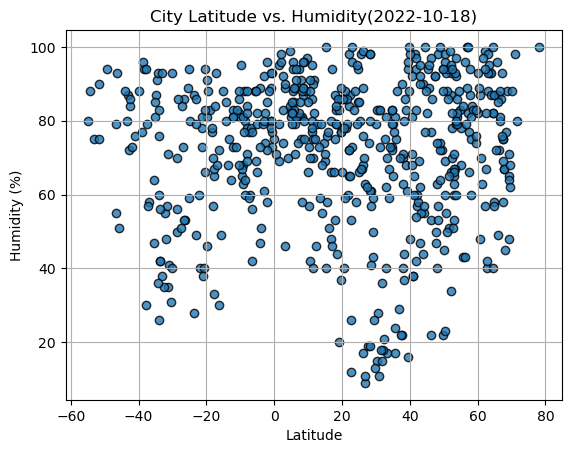

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],
            city_data_df['Humidity'],
            edgecolor='black', linewidth= 1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity(2022-10-18)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

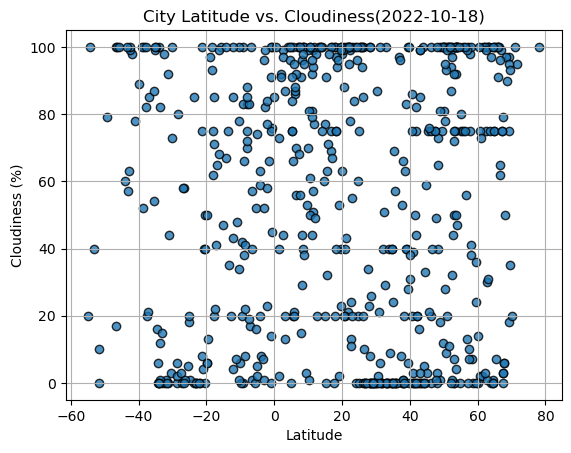

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],
            city_data_df['Cloudiness'],
            edgecolor='black', linewidth= 1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness(2022-10-18)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

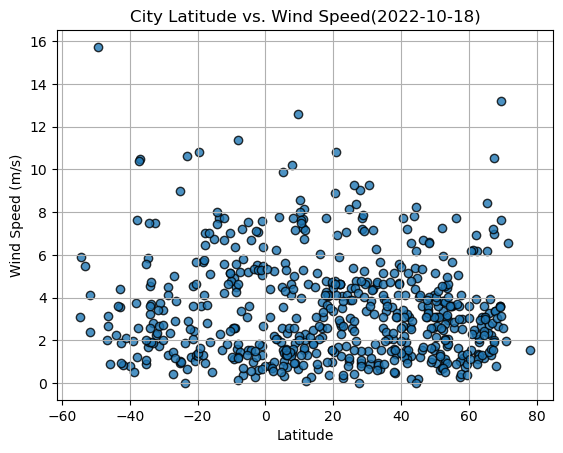

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],
            city_data_df['Wind Speed'],
            edgecolor='black', linewidth= 1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed(2022-10-18)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linearregression(xvalues, yvalues):
    (slope, intercept, rvalue, pvalue, stderr)=linregress(xvalues,yvalues)
    regressvalues = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    plt.scatter(xvalues, yvalues)
    plt.plot(xvalues, regressvalues, 'r-')
    print(f'the r squared value is:{rvalue*rvalue}')
    plt.xlabel("Latitude")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,markovo,57.3206,107.0881,291.99,66,10,0.30,RU,1691797868
2,yellowknife,62.4560,-114.3525,290.44,67,75,6.17,CA,1691797591
3,guerrero negro,27.9769,-114.0611,296.40,74,23,9.06,MX,1691797868
5,kapuskasing,49.4169,-82.4331,292.20,72,75,2.57,CA,1691797869
6,taoudenni,22.6783,-3.9836,309.15,26,13,4.05,ML,1691797869


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,288.66,81,99,0.89,NZ,1691797868
4,blackmans bay,-43.0167,147.3167,283.22,87,57,4.39,AU,1691797868
8,codrington,-38.2667,141.9667,283.69,94,100,3.74,AU,1691797869
9,waitangi,-43.9535,-176.5597,286.38,88,60,2.24,NZ,1691797869
12,port-aux-francais,-49.3500,70.2167,276.93,94,79,15.74,TF,1691797709


###  Temperature vs. Latitude Linear Regression Plot

the r squared value is:0.47416211753049403


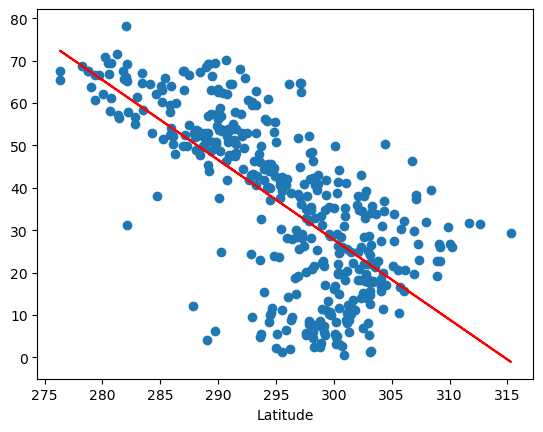

In [15]:
# Linear regression on Northern Hemisphere
plot_linearregression(northern_hemi_df['Max Temp'],northern_hemi_df['Lat'])

the r squared value is:0.7252298441790875


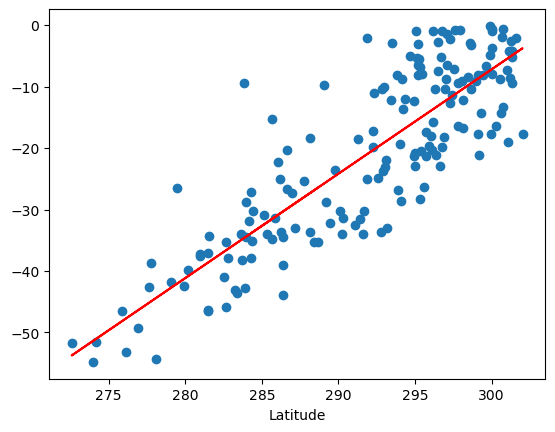

In [16]:
# Linear regression on Southern Hemisphere
plot_linearregression(southern_hemi_df['Max Temp'],southern_hemi_df['Lat'])

**Discussion about the linear relationship:The Corerelation in the Northern Hemisphere graph has an r value of .47 which means it has a weak correlation
and in the Southern Hemisphere graph we have an r value of .72 which means it has a strong correlation

### Humidity vs. Latitude Linear Regression Plot

the r squared value is:1.4778056736751114e-05


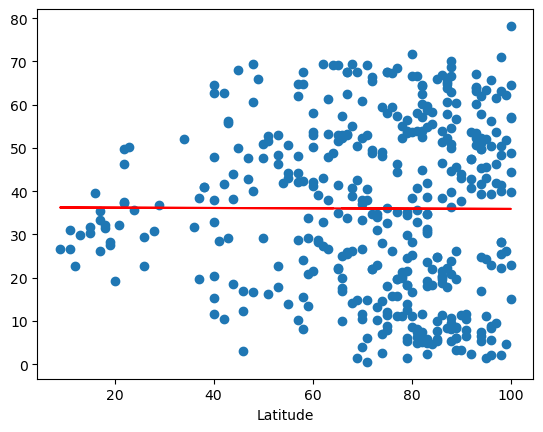

In [17]:
# Northern Hemisphere
plot_linearregression(northern_hemi_df['Humidity'],northern_hemi_df['Lat'])

the r squared value is:0.009552564970788352


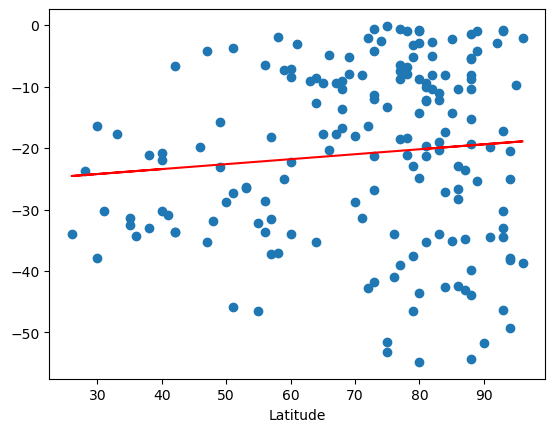

In [18]:
# Southern Hemisphere
plot_linearregression(southern_hemi_df['Humidity'],southern_hemi_df['Lat'])

**Discussion about the linear relationship: Both the graps have no correlation because their r value is less than .3

### Cloudiness vs. Latitude Linear Regression Plot

the r squared value is:0.006101988561624525


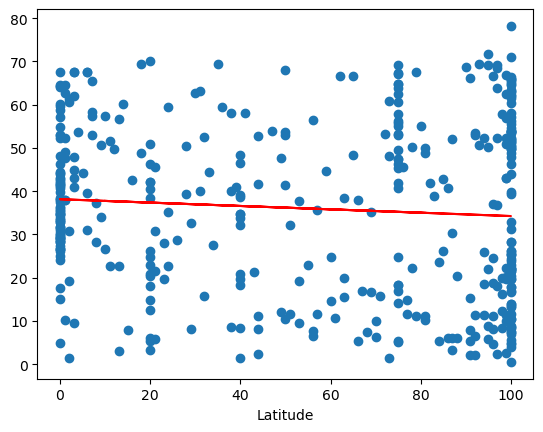

In [19]:
# Northern Hemisphere
plot_linearregression(northern_hemi_df['Cloudiness'],northern_hemi_df['Lat'])

the r squared value is:0.0004779582536563221


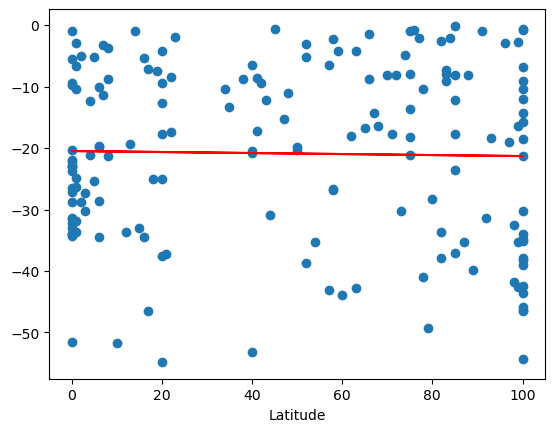

In [20]:
# Southern Hemisphere
plot_linearregression(southern_hemi_df['Cloudiness'],southern_hemi_df['Lat'])

**Discussion about the linear relationship:Both the graps have no correlation because their r value is less than .3

### Wind Speed vs. Latitude Linear Regression Plot

the r squared value is:0.0031458888449485706


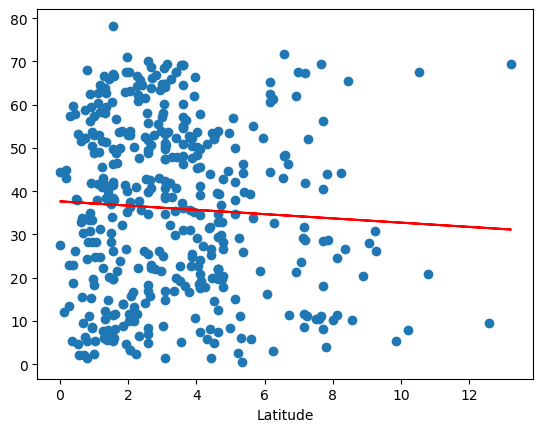

In [21]:
# Northern Hemisphere
plot_linearregression(northern_hemi_df['Wind Speed'],northern_hemi_df['Lat'])

the r squared value is:0.0003434586004637887


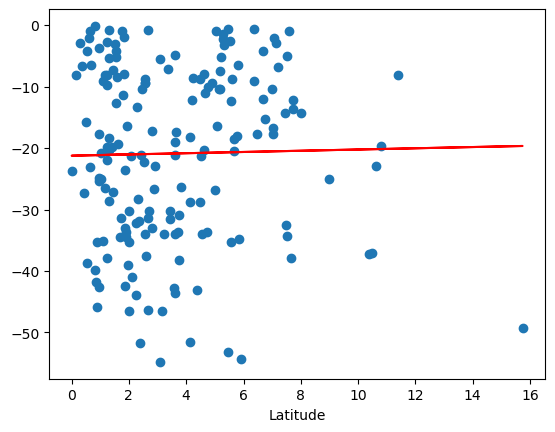

In [22]:
# Southern Hemisphere
plot_linearregression(southern_hemi_df['Wind Speed'],southern_hemi_df['Lat'])

**Discussion about the linear relationship:Both the graps have no correlation because their r value is less than .3